In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kospi_data.csv', parse_dates = ['Date'])

In [2]:
df = data.drop(['High', 'Low', 'Volume','Open'], axis =1)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df = df[df['year'] != 1981].reset_index(drop=True)       #1981년 제거

In [3]:
df['log'] = np.log(df['Close'] / df['Close'].shift(1))
df['log'][0] = df['Change'][0]
tb = df.pivot_table(index = 'year', columns = 'month', values = 'log', aggfunc ='sum').drop(2022) #2022년 제거
tb.loc[:,'sum'] = tb.loc[:, 1:12].sum(axis=1)
tb

<ipython-input-3-8ea714376f91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log'][0] = df['Change'][0]


month,1,2,3,4,5,6,7,8,9,10,11,12,sum
year,,,,,,,,,,,,,
1982,-0.042150,0.024605,-0.007404,-0.051610,-0.057905,0.076188,0.011579,-0.025424,-0.018457,0.018211,0.014253,0.042199,-0.015916
1983,-0.086765,0.043271,-0.030417,0.092727,-0.044175,-0.026754,0.021013,-0.051024,-0.009386,0.031032,-0.031712,0.029980,-0.062210
1984,0.023402,0.043989,0.028062,0.016732,-0.038489,-0.001534,0.032176,0.011602,-0.014579,-0.032735,0.043118,0.049794,0.161537
1985,-0.025307,-0.028998,0.011275,-0.017073,-0.000447,0.018399,0.005840,-0.006499,0.017575,0.014153,0.063722,0.084316,0.136956
1986,-0.018222,0.092177,0.127144,0.015646,0.129915,0.051864,0.117673,-0.033845,-0.043204,-0.051241,0.110712,0.013405,0.512025
1987,0.129240,0.076789,0.190137,-0.121917,0.078688,0.059461,0.164697,-0.023910,0.023642,0.047676,-0.067990,0.099052,0.655566
1988,0.187779,-0.034082,0.069573,-0.014253,0.102939,-0.020449,0.025635,-0.081821,0.019539,0.074288,0.130017,0.087589,0.546755
1989,-0.025578,0.037303,0.088971,-0.064606,-0.008306,-0.087503,0.046916,0.085164,-0.034284,-0.052712,0.013675,0.003733,0.002774
1990,-0.015018,-0.039339,-0.024319,-0.199713,0.147298,-0.121312,-0.041026,-0.111393,-0.006596,0.135205,0.009905,-0.001321,-0.267629


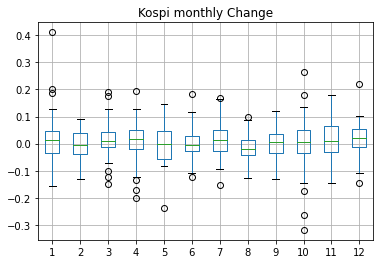

In [ ]:
tb.drop('sum', axis=1).boxplot()
plt.title('Kospi monthly Change')
plt.show()

In [ ]:
def corr_plt(month):
  plt.scatter(tb.loc[:, month], tb.loc[:,'sum'])
  plt.title("Month %x Corrcoef" % month)
  plt.show()

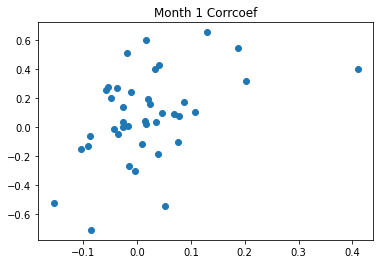

In [ ]:
corr_plt(1)

달을 치면 그 달과 연 등락률 간의 산포도 도출

In [4]:
corr = []
for i in range(1,13):
  corr.append(np.corrcoef(tb.loc[:, i], tb.loc[:, 'sum'])[0,1])
corr = pd.DataFrame(corr).set_index(np.arange(1,13))
corr.columns = ['corr']
corr

,corr
1,0.457828
2,0.119335
3,0.180585
4,0.220155
5,0.136015
6,0.330721
7,0.579066
8,0.113706
9,0.219167
10,0.536084


In [ ]:
for i in tb.columns:
  if stats.shapiro(tb.loc[:, i])[1] < 0.05: #p.value가 0.05 미만이면 귀무가설(자료는 정규성 만족) 기각
    print(i,'월 상관계수 :', np.corrcoef(tb.loc[:, i], tb.loc[:, 'sum'])[0,1],' 정규성 불만족')
  else:
    print(i,'월 상관계수 :', np.corrcoef(tb.loc[:, i], tb.loc[:, 'sum'])[0,1], ' 정규성 만족')

1 월 상관계수 : 0.45782814622271656  정규성 불만족
2 월 상관계수 : 0.11933455357982388  정규성 만족
3 월 상관계수 : 0.18058466959113428  정규성 만족
4 월 상관계수 : 0.22015489121859017  정규성 만족
5 월 상관계수 : 0.13601528469795762  정규성 만족
6 월 상관계수 : 0.3307210884443209  정규성 만족
7 월 상관계수 : 0.5790655654018777  정규성 만족
8 월 상관계수 : 0.11370590469030217  정규성 만족
9 월 상관계수 : 0.21916726479231705  정규성 만족
10 월 상관계수 : 0.5360842084209668  정규성 불만족
11 월 상관계수 : 0.5345018659699436  정규성 만족
12 월 상관계수 : 0.5736673219710907  정규성 만족
sum 월 상관계수 : 1.0  정규성 만족


n < 5000 이므로 정규성 확인을 위해 샤피로 테스트를 수행하였다.

In [ ]:
df2 = data.drop(['High', 'Low', 'Volume','Open'], axis =1).reset_index(drop=True)
df2['year'] = df2['Date'].dt.year
df2['month'] = df2['Date'].dt.month

<ipython-input-367-4b60fea2c650>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log'][0] = df2['Change'][0]


In [ ]:
df2['log'] = np.log(df2['Close'] / df2['Close'].shift(1)) #로그수익률 계산
df2['log'][0] = df2['Change'][0]    

In [ ]:
grp_df2 = df2.groupby(['year','month']).sum().reset_index()
grp_df2['lag_11'] = 0
for i in range(0, len(grp_df2)):
  grp_df2['lag_11'].iloc[i] = grp_df2['log'][i+1:i+12].sum()

In [ ]:
corr2 = []
for i in range(0,12):
  if i >= 8:
    k = grp_df2.iloc[range(i-7, len(grp_df2) - 11, 12)]
    corr2.append([i-7, np.corrcoef(k['log'], k['lag_11'])[1,0], stats.shapiro(k['log'])[1] >= 0.05, stats.shapiro(k['lag_11'])[1] >= 0.05]) # i=8부터 1월이므로
  else:
    k = grp_df2.iloc[range(i, len(grp_df2) - 11, 12)] # 마지막 11개는 반영 안해야함
    corr2.append([i+5, np.corrcoef(k['log'], k['lag_11'])[1,0], stats.shapiro(k['log'])[1] >= 0.05, stats.shapiro(k['lag_11'])[1] >= 0.05]) # i=0일 때 5월이므로
corr2 = pd.DataFrame(corr2)
corr2.columns = ['month', 'Corr', 'Log Normality', 'lag11 Normality']
corr2.set_index('month', inplace=True)
corr2 = corr2.sort_index()

In [ ]:
corr2

,Corr,Log Normality,lag11 Normality
month,,,
1,-0.097851,False,True
2,0.218004,True,False
3,-0.102669,True,True
4,0.023348,True,True
5,-0.104735,True,True
6,-0.097851,False,True
7,0.218004,True,False
8,-0.102669,True,True
9,0.023348,True,True
